In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format # Làm tròn đến thập phân thứ 2 do dataset origin

In [ ]:
merged_all=pd.read_csv(r"C:\Users\levan\Downloads\DATA_MINING_ LUẬT KẾT HỢP\merged_all.csv")

1.Tiền xử lý cho sinh luật kết hợp

In [ ]:
#mỗi “ID hợp đồng” có thể xuất hiện nhiều lần trong file data mereged_all
merged_all= (
    merged_all
    .loc[
        merged_all
        .groupby("ID hợp đồng")["Lịch sử quá hạn (khách hàng)"]
        .idxmax()
    ]
    .reset_index(drop=True)
)

In [ ]:
# Gán tình trạng tín dụng theo ngưỡng 60 ngày
merged_all["Tình trạng tín dụng"] = merged_all["Lịch sử quá hạn (khách hàng)"].apply(
    lambda x: "Tốt" if x < 60 else "Xấu"
)

In [ ]:
pd.set_option('display.max_columns', None)
merged_all.head(20)

,Loại hợp đồng,Số người phụ thuộc,Địa chỉ thường trú,Ngành,Nghề nghiệp,Địa chỉ công ty (tỉnh thành),ID hợp đồng,Cân nặng,Trình độ học vấn,Doanh thu,Tín nhiệm,Loại hình cư trú,Chiều cao,Số năm kinh nghiệm,Tình trạng hôn nhân,Nguồn doanh thu chính,Kênh thanh toán,Mức thanh khoản,Công ty bảo hiểm,Mức bảo hiểm,Ngày thanh toán,Mức vay,Có bảo hiểm,Hình thức vay,kì hạn vay,Lãi suất (tháng),Mục đích vay,Lĩnh vực,Khoản vay (VND),Tuổi,Phân lớp doanh thu,Phân lớp khoản vay,Phân lớp tuổi,TỈNH,VÙNG,Ngày xuất data,Tổng tiền (tháng),Ngày thu tiền (tháng),Mã giao dịch,Nợ phải trả (VND),Nợ gốc (VND),Nợ lãi (%),Tiền phạt quá hạn (VND),Số ngày quá hạn hợp đồng,Khách hàng quá hạn (ngày),Ngày trả,Khoản trả,Trễ hạn (tháng),Lịch sử quá hạn (hợp đồng),Thanh toán (tháng),Lịch sử quá hạn (khách hàng),Nhóm quá hạn,Tình trạng tín dụng
0,4.00,0.00,27.00,NaN,NaN,27.00,340732.00,59.00,1.00,18808000.00,4.00,1.00,174.00,4.00,0.00,5.00,1.00,1.00,0.00,3.00,2022-02,3.00,YES,2.00,30.00,1.50,6.00,0.00,3540000.00,29.00,Cao,25-36,Gen Y,Bắc Ninh,Red River Delta,2023-03,828.05,NaN,0,2984.72,0.00,0.00,0.00,0.00,0.00,2023-03-04 00:00:00.000,825.63,1.00,2.00,12.00,2.00,B0,Tốt
1,NaN,1.00,NaN,18.00,6.00,NaN,341586.00,97.00,2.00,NaN,4.00,0.00,142.00,20.00,2.00,1.00,2.00,5.00,1.00,3.00,2022-02,NaN,YES,NaN,36.00,NaN,1.00,0.00,3000000.00,52.00,NaN,25-36,Gen X,NaN,NaN,2022-10,700.71,NaN,1,3055.03,0.00,0.00,0.00,0.00,0.00,2022-10-03 00:00:00.000,700.71,1.00,2.00,7.00,2.00,B0,Tốt
2,4.00,0.00,38.00,18.00,9.00,75.00,342421.00,87.00,1.00,12264000.00,NaN,3.00,175.00,5.00,NaN,5.00,1.00,NaN,NaN,2.75,2022-03,3.00,YES,2.00,24.00,1.50,1.00,0.00,2980000.00,28.00,Trung bình cao,13-24,Gen Z,Thanh Hóa,Central Coast,2023-03,817.31,NaN,0,3057.54,3057.54,1443.04,981.62,242.00,242.00,2023-03-24 00:00:00.000,36.51,8.00,242.00,12.00,242.00,B10,Xấu
3,4.00,0.00,84.00,18.00,9.00,74.00,342927.00,90.00,1.00,17018000.00,1.00,3.00,170.00,12.00,2.00,5.00,1.00,2.00,1.00,NaN,2022-03,5.00,NaN,0.00,24.00,1.80,1.00,0.00,1750000.00,40.00,Cao,13-24,Gen Y,Trà Vinh,NaN,2022-04,709.69,2022-04-15 00:00:00.000,0,2745.80,0.00,0.00,0.00,0.00,0.00,2022-04-13 00:00:00.000,709.69,0.00,0.00,1.00,0.00,B0,Tốt
4,4.00,1.00,51.00,NaN,6.00,51.00,343573.00,63.00,1.00,19063000.00,2.00,1.00,184.00,1.00,1.00,NaN,1.00,NaN,0.00,3.00,2022-03,NaN,YES,NaN,36.00,1.50,6.00,0.00,4890000.00,42.00,Cao,25-36,Gen Y,Quảng Ngãi,Central Highlands,2023-03,941.81,NaN,0,3744.65,0.00,0.00,0.00,0.00,0.00,2023-03-02 00:00:00.000,941.81,1.00,1.00,12.00,1.00,B0,Tốt
5,4.00,NaN,79.00,NaN,NaN,79.00,343714.00,94.00,1.00,15413000.00,4.00,1.00,167.00,10.00,NaN,5.00,NaN,5.00,1.00,3.00,NaN,3.00,YES,0.00,36.00,1.80,1.00,0.00,2660000.00,NaN,Cao,25-36,NaN,Hồ Chí Minh,Southeast,2023-03,718.56,NaN,0,3055.43,3055.43,1542.53,893.61,243.00,243.00,2023-03-24 00:00:00.000,18.26,9.00,243.00,12.00,243.00,B10,Xấu
6,4.00,2.00,82.00,NaN,6.00,82.00,343990.00,64.00,3.00,17533000.00,3.00,0.00,147.00,6.00,2.00,1.00,2.00,1.00,0.00,NaN,2022-02,4.00,YES,1.00,36.00,NaN,1.00,0.00,1470000.00,NaN,Cao,25-36,NaN,Tiền Giang,NaN,2022-04,615.90,NaN,0,2643.67,0.00,0.00,0.00,0.00,0.00,2022-04-28 00:00:00.000,615.90,0.00,0.00,1.00,0.00,B0,Tốt
7,2.00,1.00,87.00,18.00,9.00,74.00,344001.00,71.00,2.00,15413000.00,5.00,3.00,184.00,1.00,NaN,5.00,1.00,1.00,0.00,3.00,2022-03,1.00,NaN,0.00,36.00,NaN,1.00,0.00,NaN,32.00,Cao,25-36,Gen Y,Đồng Tháp,Mekong River Delta,2023-03,925.02,NaN,0,4144.13,4144.13,1935.56,1759.30,304.00,304.00,2023-03-24 00:00:00.000,25.82,10.00,304.00,12.00,304.00,B12,Xấu
8,4.00,0.00,22.00,18.00,6.00,22.00,344010.00,95.00,1.00,NaN,NaN,0.00,178.00,3.00,2.00,1.00,2.00,2.00,0.00,3.00,2022-03,NaN,YES,NaN,36.00,2.20,1.00,0.00,4010000.00,58.00,NaN,25-36,Gen X,Quảng Ninh,Northern Midland,2022-11,877.69,2022-11-04 00:00:00.000,0,3539.27,0.00,0.00,0.00,0.00,0.00,2022-11-10 00:00:00.000,879.58,6.00,6.00,8.00,6.00,B0,Tốt
9,4.00,0.00,96.00,NaN,9.00,74.00,344205.00,54.00,2.00,18522000.00,NaN,3.00,164.00,2.00,NaN,5.00,1.00,2.00,NaN,3.00,2022-03,1.00,YES,1.00,36.00,2.00,6.00,0.00,1470000.00,22.00,Cao,

In [ ]:
# Danh sách cột cần loại bỏ
cols_to_drop = [

    # === NHÓM BIẾN ĐỊNH DANH / THỜI GIAN KỸ THUẬT ===
    "Mã giao dịch",
    "Ngày xuất data",
    "Ngày thanh toán",
    "Ngày thu tiền (tháng)",
    "Ngày trả",


    # === NHÓM BIẾN SINH TRẮC ===
    "Chiều cao",
    "Cân nặng",

    # === NHÓM BIẾN ĐỊA CHỈ CHI TIẾT ===
    "Địa chỉ thường trú",
    "Địa chỉ công ty (tỉnh thành)",
    "VÙNG",

    # === NHÓM BIẾN TRÙNG THÔNG TIN ===
    "Tuổi",                 # đã có Phân lớp tuổi
    "Doanh thu",             # đã có Phân lớp doanh thu
    "kì hạn vay",            # đã có Phân lớp khoản vay
    "Nhóm quá hạn",          # đã dùng tạo Tình trạng tín dụng

    # === NHÓM BIẾN KỸ THUẬT / PHỤ TRỢ THANH TOÁN ===
    "Kênh thanh toán",
    "Công ty bảo hiểm",
    "Mức bảo hiểm",
    "Có bảo hiểm",

    # === BIẾN HẬU QUẢ DO QUÁ HẠN  ===
    "Tiền phạt quá hạn (VND)",
    "Số ngày quá hạn hợp đồng",
    "Khách hàng quá hạn (ngày)",
    "Trễ hạn (tháng)",
    "Lịch sử quá hạn (hợp đồng)",
    "Lịch sử quá hạn (khách hàng)",
    "Nợ lãi (%)",
    "Nợ phải trả (VND)",
    "Nợ gốc (VND)",
    "Khoản trả",
    "Tổng tiền (tháng)",
    "Lãi suất (tháng)",
    "Thanh toán (tháng)",
    "Ngành",
    "Lĩnh vực",
    "Tín nhiệm"
]

# Copy dữ liệu gốc
data_1 = merged_all.copy()

# Drop các cột tồn tại trong dataframe
data_1 = data_1.drop(
    columns=[col for col in cols_to_drop if col in data_1.columns],
    errors="ignore"
)



In [ ]:
#xem dữ liệu bị thiếu
missing_summary = pd.DataFrame({
    "Số giá trị thiếu": data_1.isnull().sum(),
    "Tỷ lệ thiếu (%)": (data_1.isnull().mean() * 100).round(2)
})

missing_summary = missing_summary.sort_values(
    by="Tỷ lệ thiếu (%)",
    ascending=False
)

missing_summary


,Số giá trị thiếu,Tỷ lệ thiếu (%)
Phân lớp tuổi,14971,27.92
Loại hợp đồng,10589,19.74
Mức thanh khoản,9354,17.44
Mức vay,9313,17.37
Số năm kinh nghiệm,9001,16.78
Tình trạng hôn nhân,8436,15.73
Số người phụ thuộc,8409,15.68
Loại hình cư trú,8404,15.67
Nguồn doanh thu chính,8298,15.47
Trình độ học vấn,8285,15.45


In [ ]:
 #loại dữ liệu bị thiếu
 data_1.dropna()

,Loại hợp đồng,Số người phụ thuộc,Nghề nghiệp,ID hợp đồng,Trình độ học vấn,Loại hình cư trú,Số năm kinh nghiệm,Tình trạng hôn nhân,Nguồn doanh thu chính,Mức thanh khoản,Mức vay,Hình thức vay,Mục đích vay,Khoản vay (VND),Phân lớp doanh thu,Phân lớp khoản vay,Phân lớp tuổi,TỈNH,Tình trạng tín dụng
3,4.00,0.00,9.00,342927.00,1.00,3.00,12.00,2.00,5.00,2.00,5.00,0.00,1.00,1750000.00,Cao,13-24,Gen Y,Trà Vinh,Tốt
64,4.00,2.00,9.00,344968.00,1.00,1.00,1.00,2.00,5.00,4.00,5.00,0.00,3.00,850000.00,Cao,13-24,Gen Z,Bắc Giang,Tốt
74,4.00,0.00,4.00,344994.00,1.00,3.00,2.00,0.00,5.00,1.00,3.00,1.00,1.00,4430000.00,Cao,25-36,Gen Z,Kiên Giang,Tốt
78,4.00,2.00,6.00,345004.00,1.00,1.00,15.00,1.00,1.00,4.00,3.00,13.00,3.00,1460000.00,Cao,13-24,Gen Y,An Giang,Xấu
91,4.00,0.00,9.00,345043.00,5.00,0.00,3.00,2.00,5.00,2.00,3.00,1.00,6.00,1460000.00,Trung bình,13-24,Gen X,Quảng Nam,Tốt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53104,4.00,0.00,9.00,791852.00,3.00,3.00,4.00,0.00,5.00,3.00,1.00,0.00,3.00,1500000.00,Cao,13-24,Gen Z,An Giang,Xấu
53128,4.00,1.00,6.00,791949.00,1.00,0.00,4.00,1.00,1.00,5.00,2.00,5.00,3.00,3030000.00,Cao,13-24,Gen Y,Quảng Nam,Tốt
53139,4.00,2.00,6.00,791988.00,1.00,0.00,4.00,2.00,1.00,4.00,3.00,8.00,3.00,1500000.00,Cao,13-24,Gen Y,Thanh Hóa,Tốt
53188,4.00,2.00,2.00,792114.00,1.00,0.00,12.00,2.00,5.00,2.00,5.00,9.00,3.00,290000.00,Cao,1-12,Gen X,Quảng Nam,Tốt


In [ ]:
#PHÂN LỚP CHO KHOẢN VAY
bins = [0, 1_470_000, 2_980_000, 3_540_000, float("inf")]

data_1["Khoản_vay_bin"] = pd.cut(
    data_1["Khoản vay (VND)"],
    bins=bins,
    right=True
)
data_1.drop(columns=["Khoản vay (VND)"], inplace=True)


In [ ]:
data_1.head(20)

,Loại hợp đồng,Số người phụ thuộc,Nghề nghiệp,ID hợp đồng,Trình độ học vấn,Loại hình cư trú,Số năm kinh nghiệm,Tình trạng hôn nhân,Nguồn doanh thu chính,Mức thanh khoản,Mức vay,Hình thức vay,Mục đích vay,Phân lớp doanh thu,Phân lớp khoản vay,Phân lớp tuổi,TỈNH,Tình trạng tín dụng,Khoản_vay_bin
0,4.00,0.00,NaN,340732.00,1.00,1.00,4.00,0.00,5.00,1.00,3.00,2.00,6.00,Cao,25-36,Gen Y,Bắc Ninh,Tốt,"(2980000.0, 3540000.0]"
1,NaN,1.00,6.00,341586.00,2.00,0.00,20.00,2.00,1.00,5.00,NaN,NaN,1.00,NaN,25-36,Gen X,NaN,Tốt,"(2980000.0, 3540000.0]"
2,4.00,0.00,9.00,342421.00,1.00,3.00,5.00,NaN,5.00,NaN,3.00,2.00,1.00,Trung bình cao,13-24,Gen Z,Thanh Hóa,Xấu,"(1470000.0, 2980000.0]"
3,4.00,0.00,9.00,342927.00,1.00,3.00,12.00,2.00,5.00,2.00,5.00,0.00,1.00,Cao,13-24,Gen Y,Trà Vinh,Tốt,"(1470000.0, 2980000.0]"
4,4.00,1.00,6.00,343573.00,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,6.00,Cao,25-36,Gen Y,Quảng Ngãi,Tốt,"(3540000.0, inf]"
5,4.00,NaN,NaN,343714.00,1.00,1.00,10.00,NaN,5.00,5.00,3.00,0.00,1.00,Cao,25-36,NaN,Hồ Chí Minh,Xấu,"(1470000.0, 2980000.0]"
6,4.00,2.00,6.00,343990.00,3.00,0.00,6.00,2.00,1.00,1.00,4.00,1.00,1.00,Cao,25-36,NaN,Tiền Giang,Tốt,"(0.0, 1470000.0]"
7,2.00,1.00,9.00,344001.00,2.00,3.00,1.00,NaN,5.00,1.00,1.00,0.00,1.00,Cao,25-36,Gen Y,Đồng Tháp,Xấu,NaN
8,4.00,0.00,6.00,344010.00,1.00,0.00,3.00,2.00,1.00,2.00,NaN,NaN,1.00,NaN,25-36,Gen X,Quảng Ninh,Tốt,"(3540000.0, inf]"
9,4.00,0.00,9.00,344205.00,2.00,3.00,2.00,NaN,5.00,2.00,1.00,1.00,6.00,Cao,25-36,Gen Z,Cà Mau,Xấu,"(0.0, 1470000.0]"


ÁP DỤNG THUẬT TOÁN ECLAT

In [ ]:
# Set lại cột data_1 là dan
data_1 = data_1.astype(str)
# Reset index

# Đảm bảo column name là string
data_1.columns = data_1.columns.astype(str)

In [ ]:
ID_COL = "ID hợp đồng"

feature_cols = [c for c in data_1.columns if c != ID_COL]

def row_to_items(df_group: pd.DataFrame) -> set:
    # Nếu mỗi ID có nhiều dòng, ta lấy tất cả value của từng cột trong group
    items = set()
    for col in feature_cols:
        # Lấy các giá trị khác NA, unique trong group
        vals = df_group[col].dropna().unique().tolist()
        for v in vals:
            items.add(f"{col}={v}")   # gắn prefix tên cột
    return items

eclat_items = (
    data_1.groupby(ID_COL, dropna=False)
          .apply(row_to_items)
          .reset_index(name="items")
)

eclat_items.head(10)


C:\Users\levan\AppData\Local\Temp\ipykernel_1572\4140306814.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(row_to_items)


,ID hợp đồng,items
0,340732.0,"{Loại hợp đồng=4.0, Nguồn doanh thu chính=5.0,..."
1,341586.0,"{Số người phụ thuộc=1.0, TỈNH=nan, Số năm kinh..."
2,342421.0,"{Loại hợp đồng=4.0, Nguồn doanh thu chính=5.0,..."
3,342927.0,"{Loại hợp đồng=4.0, Nguồn doanh thu chính=5.0,..."
4,343573.0,"{Số người phụ thuộc=1.0, Loại hợp đồng=4.0, Mụ..."
5,343714.0,"{Loại hợp đồng=4.0, Nguồn doanh thu chính=5.0,..."
6,343990.0,"{Loại hợp đồng=4.0, Số năm kinh nghiệm=6.0, Tì..."
7,344001.0,"{Loại hợp đồng=2.0, Số người phụ thuộc=1.0, Ng..."
8,344010.0,"{Số năm kinh nghiệm=3.0, Loại hợp đồng=4.0, Tì..."
9,344205.0,"{Loại hợp đồng=4.0, Nguồn doanh thu chính=5.0,..."


In [ ]:
# tách item từ cột itemDescription
group_eclat_df = eclat_items.head(10)['items'].str.get_dummies(', ')
group_eclat_df

,'Hình thức vay=0.0','Hình thức vay=1.0','Hình thức vay=2.0','Hình thức vay=nan','Khoản_vay_bin=(0.0,'Khoản_vay_bin=(1470000.0,'Khoản_vay_bin=(2980000.0,'Khoản_vay_bin=(3540000.0,'Khoản_vay_bin=nan','Loại hình cư trú=0.0','Loại hình cư trú=1.0','Loại hình cư trú=3.0','Loại hợp đồng=4.0','Loại hợp đồng=nan','Mục đích vay=1.0','Mục đích vay=6.0','Mức thanh khoản=1.0','Mức thanh khoản=2.0','Mức thanh khoản=2.0'},'Mức thanh khoản=5.0','Mức thanh khoản=nan','Mức vay=1.0','Mức vay=3.0','Mức vay=3.0'},'Mức vay=4.0','Mức vay=5.0','Mức vay=nan','Nghề nghiệp=6.0','Nghề nghiệp=6.0'},'Nghề nghiệp=9.0','Nghề nghiệp=nan','Nguồn doanh thu chính=1.0','Nguồn doanh thu chính=1.0'},'Nguồn doanh thu chính=5.0','Nguồn doanh thu chính=nan','Phân lớp doanh thu=Cao','Phân lớp doanh thu=Trung bình cao','Phân lớp doanh thu=nan','Phân lớp khoản vay=13-24','Phân lớp khoản vay=25-36','Phân lớp tuổi=Gen X','Phân lớp tuổi=Gen Y','Phân lớp tuổi=Gen Z','Phân lớp tuổi=nan','Số người phụ thuộc=0.0','Số người phụ thuộc=1.0','Số người phụ thuộc=2.0','Số người phụ thuộc=nan','Số năm kinh nghiệm=1.0','Số năm kinh nghiệm=1.0'},'Số năm kinh nghiệm=10.0'},'Số năm kinh nghiệm=12.0','Số năm kinh nghiệm=2.0','Số năm kinh nghiệm=20.0','Số năm kinh nghiệm=4.0','Số năm kinh nghiệm=5.0','Số năm kinh nghiệm=6.0','Trình độ học vấn=1.0','Trình độ học vấn=2.0','Trình độ học vấn=3.0','Tình trạng hôn nhân=0.0','Tình trạng hôn nhân=1.0','Tình trạng hôn nhân=2.0','Tình trạng hôn nhân=nan','Tình trạng tín dụng=Tốt','Tình trạng tín dụng=Xấu','TỈNH=Bắc Ninh','TỈNH=Cà Mau','TỈNH=Hồ Chí Minh','TỈNH=Quảng Ngãi','TỈNH=Quảng Ninh','TỈNH=Thanh Hóa','TỈNH=Tiền Giang','TỈNH=Trà Vinh','TỈNH=nan','TỈNH=Đồng Tháp',1470000.0]',2980000.0]',3540000.0]',inf]',{'Loại hợp đồng=2.0',{'Loại hợp đồng=4.0',{'Số người phụ thuộc=1.0',{'Số năm kinh nghiệm=3.0'
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
9,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
# chuyển đổi format để sử dụng pyECLAT
for column in group_eclat_df.columns:
    group_eclat_df[column] = group_eclat_df[column].apply(lambda x: column if x else None)
group_eclat_df.columns = range(len(group_eclat_df.columns))
group_eclat_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
0,None,None,'Hình thức vay=2.0',None,None,None,'Khoản_vay_bin=(2980000.0,None,None,None,'Loại hình cư trú=1.0',None,None,None,None,'Mục đích vay=6.0','Mức thanh khoản=1.0',None,None,None,None,None,None,'Mức vay=3.0'},None,None,None,None,None,None,'Nghề nghiệp=nan',None,None,'Nguồn doanh thu chính=5.0',None,'Phân lớp doanh thu=Cao',None,None,None,'Phân lớp khoản vay=25-36',None,'Phân lớp tuổi=Gen Y',None,None,'Số người phụ thuộc=0.0',None,None,None,None,None,None,None,None,None,'Số năm kinh nghiệm=4.0',None,None,'Trình độ học vấn=1.0',None,None,'Tình trạng hôn nhân=0.0',None,None,None,'Tình trạng tín dụng=Tốt',None,'TỈNH=Bắc Ninh',None,None,None,None,None,None,None,None,None,None,None,3540000.0]',None,None,{'Loại hợp đồng=4.0',None,None
1,None,None,None,'Hình thức vay=nan',None,None,'Khoản_vay_bin=(2980000.0,None,None,'Loại hình cư trú=0.0',None,None,None,'Loại hợp đồng=nan','Mục đích vay=1.0',None,None,None,None,'Mức thanh khoản=5.0',None,None,None,None,None,None,'Mức vay=nan',None,'Nghề nghiệp=6.0'},None,None,'Nguồn doanh thu chính=1.0',None,None,None,None,None,'Phân lớp doanh thu=nan',None,'Phân lớp khoản vay=25-36','Phân lớp tuổi=Gen X',None,None,None,None,None,None,None,None,None,None,None,None,'Số năm kinh nghiệm=20.0',None,None,None,None,'Trình độ học vấn=2.0',None,None,None,'Tình trạng hôn nhân=2.0',None,'Tình trạng tín dụng=Tốt',None,None,None,None,None,None,None,None,None,'TỈNH=nan',None,None,None,3540000.0]',None,None,None,{'Số người phụ thuộc=1.0',None
2,None,None,'Hình thức vay=2.0',None,None,'Khoản_vay_bin=(1470000.0,None,None,None,None,None,'Loại hình cư trú=3.0',None,None,'Mục đích vay=1.0',None,None,None,None,None,'Mức thanh khoản=nan',None,None,'Mức vay=3.0'},None,None,None,None,None,'Nghề nghiệp=9.0',None,None,None,'Nguồn doanh thu chính=5.0',None,None,'Phân lớp doanh thu=Trung bình cao',None,'Phân lớp khoản vay=13-24',None,None,None,'Phân lớp tuổi=Gen Z',None,'Số người phụ thuộc=0.0',None,None,None,None,None,None,None,None,None,None,'Số năm kinh nghiệm=5.0',None,'Trình độ học vấn=1.0',None,None,None,None,None,'Tình trạng hôn nhân=nan',None,'Tình trạng tín dụng=Xấu',None,None,None,None,None,'TỈNH=Thanh Hóa',None,None,None,None,None,2980000.0]',None,None,None,{'Loại hợp đồng=4.0',None,None
3,'Hình thức vay=0.0',None,None,None,None,'Khoản_vay_bin=(1470000.0,None,None,None,None,None,'Loại hình cư trú=3.0',None,None,'Mục đích vay=1.0',None,None,None,'Mức thanh khoản=2.0'},None,None,None,None,None,None,'Mức vay=5.0',None,None,None,'Nghề nghiệp=9.0',None,None,None,'Nguồn doanh thu chính=5.0',None,'Phân lớp doanh thu=Cao',None,None,'Phân lớp khoản vay=13-24',None,None,'Phân lớp tuổi=Gen Y',None,None,'Số người phụ thuộc=0.0',None,None,None,None,None,None,'Số năm kinh nghiệm=12.0',None,None,None,None,None,'Trình độ học vấn=1.0',None,None,None,None,'Tình trạng hôn nhân=2.0',None,'Tình trạng tín dụng=Tốt',None,None,None,None,None,None,None,None,'TỈNH=Trà Vinh',None,None,None,2980000.0]',None,None,None,{'Loại hợp đồng=4.0',None,None
4,None,None,None,'Hình thức vay=nan',None,None,None,'Khoản_vay_bin=(3540000.0,None,None,'Loại hình cư trú=1.0',None,'Loại hợp đồng=4.0',None,None,'Mục đích vay=6.0',None,None,None,None,'Mức thanh khoản=nan',None,None,None,None,None,'Mức vay=nan',None,'Nghề nghiệp=6.0'},None,None,None,None,None,'Nguồn doanh thu chính=nan','Phân lớp doanh thu=Cao',None,None,None,'Phân lớp khoản vay=25-36',None,'Phân lớp tuổi=Gen Y',None,None,None,None,None,None,'Số năm kinh nghiệm=1.0',None,None,None,None,None,None,None,None,'Trình độ học vấn=1.0',None,None,None,'Tình trạng hôn nhân=1.0',None,None,'Tình trạng tín dụng=Tốt',None,None,None,None,'TỈNH=Quảng Ngãi',None,None,None,None,None,None,None,None,None,inf]',None,None,{'Số người phụ thuộc=1.0',None
5,'Hình thức vay=0.0',

In [ ]:
from pyECLAT import ECLAT

group_eclat1 = ECLAT(group_eclat_df, verbose = True)
index2, support2 = group_eclat1.fit(min_support=0.1, separator=', ')

100%|██████████| 85/85 [00:00<00:00, 8501.43it/s]


Combination 1 by 1


84it [00:00, 89.74it/s]


Combination 2 by 2


3486it [00:31, 109.99it/s]


Combination 3 by 3


95284it [13:30, 117.63it/s]


In [ ]:
from collections import defaultdict

grouped = defaultdict(list)

for itemset, sup in support2.items():
    grouped[len(itemset)].append((itemset, sup))

for k in sorted(grouped):
    print(f"\n=== {k}-ITEMSETS ({len(grouped[k])}) ===")
    for itemset, sup in grouped[k][:10]:
        print(f"{itemset} | support = {sup:.3f}")



=== 10-ITEMSETS (1) ===
'TỈNH=nan' | support = 0.100

=== 13-ITEMSETS (6) ===
'TỈNH=Cà Mau' | support = 0.100
'Mức vay=4.0' | support = 0.100
'Mức vay=3.0' | support = 0.100
'Mức vay=1.0' | support = 0.200
'Mức vay=5.0' | support = 0.100
'Mức vay=nan' | support = 0.300

=== 15-ITEMSETS (2) ===
'TỈNH=Bắc Ninh' | support = 0.100
'TỈNH=Trà Vinh' | support = 0.100

=== 16-ITEMSETS (2) ===
'TỈNH=Thanh Hóa' | support = 0.100
'TỈNH=Đồng Tháp' | support = 0.100

=== 17-ITEMSETS (6) ===
'Nghề nghiệp=9.0' | support = 0.400
'TỈNH=Quảng Ninh' | support = 0.100
'TỈNH=Quảng Ngãi' | support = 0.100
'Nghề nghiệp=nan' | support = 0.200
'TỈNH=Tiền Giang' | support = 0.100
'Nghề nghiệp=6.0' | support = 0.100

=== 18-ITEMSETS (3) ===
'Mục đích vay=1.0' | support = 0.700
'TỈNH=Hồ Chí Minh' | support = 0.100
'Mục đích vay=6.0' | support = 0.300

=== 19-ITEMSETS (8) ===
'Loại hợp đồng=4.0' | support = 0.200
'Phân lớp tuổi=nan' | support = 0.200
'Khoản_vay_bin=nan' | support = 0.100
'Hình thức vay=2.0' | sup

In [ ]:

grouped = defaultdict(list)

# gom theo số lượng item
for itemset, sup in support.items():
    grouped[len(itemset)].append((itemset, sup))

# đưa vào dataframe
rows = []

for k in sorted(grouped):
    for itemset, sup in grouped[k]:
        rows.append({
            "Num_items": k,
            "Itemset": itemset,
            "Support": sup
        })

itemsets_df = pd.DataFrame(rows)

In [ ]:
#Xuất ra file excel
itemsets_df.to_csv(
    r"C:\Users\levan\Downloads\DATA_MINING_ LUẬT KẾT HỢP\itemsets_df.csv",
    index=False,
    encoding="utf-8-sig"
)

In [ ]:
import pandas as pd

# Đọc file luật kết hợp
df = pd.read_csv(r"C:\Users\levan\Downloads\DATA_MINING_ LUẬT KẾT HỢP\itemsets_df.csv")

print(df.head(20))
print("Số dòng dữ liệu:", df.shape[0])


    Num_items                           Itemset  Support
0           1            ("'Nghề nghiệp=9.0'",)     0.40
1           1    ("'Số năm kinh nghiệm=20.0'",)     0.10
2           1            ("'TỈNH=Quảng Ninh'",)     0.10
3           1     ("'Số năm kinh nghiệm=5.0'",)     0.10
4           1          ("'Loại hợp đồng=4.0'",)     0.20
5           1  ("'Nguồn doanh thu chính=nan'",)     0.10
6           1     ("'Phân lớp doanh thu=nan'",)     0.20
7           1                ("'TỈNH=Cà Mau'",)     0.10
8           1       ("'Loại hình cư trú=1.0'",)     0.30
9           1     ("'Số người phụ thuộc=1.0'",)     0.10
10          1   ("'Phân lớp khoản vay=13-24'",)     0.20
11          1        ("'Mức thanh khoản=5.0'",)     0.20
12          1    ("'Tình trạng tín dụng=Tốt'",)     0.60
13          1                ("'Mức vay=4.0'",)     0.10
14          1     ("'Phân lớp doanh thu=Cao'",)     0.70
15          1           ("'Mục đích vay=1.0'",)     0.70
16          1        ("'Phân lớ

In [ ]:
import ast
import pandas as pd

def clean_itemset_strict(raw):
      """
    Hàm làm sạch và chuẩn hóa itemset sinh ra từ thuật toán ECLAT.

    Mục đích:
    - Chuyển itemset từ dạng chuỗi sang tuple Python
    - Loại bỏ các item rác (nan, none, rỗng)
    - Loại bỏ item trùng lặp trong cùng một itemset
    - Chuẩn hóa item về dạng: 'Thuộc tính=Giá trị'
    """
    if pd.isna(raw):
        return None

    # string → tuple
    if isinstance(raw, str):
        raw = ast.literal_eval(raw)

    items = []

    for x in raw:
        parts = x.split(",")
        for p in parts:
            p = (
                p.strip()
                 .replace("'", "")
                 .replace('"', "")
            )

            # loại nan / none / rỗng
            if (
                p == ""
                or p.lower().endswith("=nan")
                or p.lower().endswith("=none")
            ):
                continue

            items.append(p)

    # nếu rỗng → loại
    if len(items) == 0:
        return None

    return tuple(dict.fromkeys(items))

In [ ]:
df["clean"] = df["Itemset"].apply(clean_itemset_strict)

df = df[
    df["clean"].notna()
].reset_index(drop=True)

df.head(10)


,Num_items,Itemset,Support,clean
0,1,"(""'Nghề nghiệp=9.0'"",)",0.4,"(Nghề nghiệp=9.0,)"
1,1,"(""'Số năm kinh nghiệm=20.0'"",)",0.1,"(Số năm kinh nghiệm=20.0,)"
2,1,"(""'TỈNH=Quảng Ninh'"",)",0.1,"(TỈNH=Quảng Ninh,)"
3,1,"(""'Số năm kinh nghiệm=5.0'"",)",0.1,"(Số năm kinh nghiệm=5.0,)"
4,1,"(""'Loại hợp đồng=4.0'"",)",0.2,"(Loại hợp đồng=4.0,)"
5,1,"(""'TỈNH=Cà Mau'"",)",0.1,"(TỈNH=Cà Mau,)"
6,1,"(""'Loại hình cư trú=1.0'"",)",0.3,"(Loại hình cư trú=1.0,)"
7,1,"(""'Số người phụ thuộc=1.0'"",)",0.1,"(Số người phụ thuộc=1.0,)"
8,1,"(""'Phân lớp khoản vay=13-24'"",)",0.2,"(Phân lớp khoản vay=13-24,)"
9,1,"(""'Mức thanh khoản=5.0'"",)",0.2,"(Mức thanh khoản=5.0,)"


In [ ]:
itemsets_valid = df[
    df["clean"].apply(lambda x: len(x) >= 2)
].reset_index(drop=True)

itemsets_valid.head(10)

,Num_items,Itemset,Support,clean
0,1,"(""'Nghề nghiệp=9.0', 'Số năm kinh nghiệm=5.0'"",)",0.1,"(Nghề nghiệp=9.0, Số năm kinh nghiệm=5.0)"
1,1,"(""'Nghề nghiệp=9.0', 'TỈNH=Cà Mau'"",)",0.1,"(Nghề nghiệp=9.0, TỈNH=Cà Mau)"
2,1,"(""'Nghề nghiệp=9.0', 'Số người phụ thuộc=1.0'"",)",0.1,"(Nghề nghiệp=9.0, Số người phụ thuộc=1.0)"
3,1,"(""'Nghề nghiệp=9.0', 'Phân lớp khoản vay=13-24...",0.2,"(Nghề nghiệp=9.0, Phân lớp khoản vay=13-24)"
4,1,"(""'Nghề nghiệp=9.0', 'Tình trạng tín dụng=Tốt'"",)",0.1,"(Nghề nghiệp=9.0, Tình trạng tín dụng=Tốt)"
5,1,"(""'Nghề nghiệp=9.0', 'Phân lớp doanh thu=Cao'"",)",0.3,"(Nghề nghiệp=9.0, Phân lớp doanh thu=Cao)"
6,1,"(""'Nghề nghiệp=9.0', 'Mục đích vay=1.0'"",)",0.3,"(Nghề nghiệp=9.0, Mục đích vay=1.0)"
7,1,"(""'Nghề nghiệp=9.0', 'Phân lớp tuổi=Gen Z'"",)",0.2,"(Nghề nghiệp=9.0, Phân lớp tuổi=Gen Z)"
8,1,"(""'Nghề nghiệp=9.0', 'Trình độ học vấn=1.0'"",)",0.2,"(Nghề nghiệp=9.0, Trình độ học vấn=1.0)"
9,1,"(""'Nghề nghiệp=9.0', 'Phân lớp khoản vay=25-36...",0.2,"(Nghề nghiệp=9.0, Phân lớp khoản vay=25-36)"


In [ ]:
itemsets_valid["Num_items"] = itemsets_valid["clean"].apply(len)
# Mục đích:
# - Chuyển mỗi itemset từ dạng tuple sang dạng cột riêng lẻ
# - Giúp dễ kiểm tra sự xuất hiện của từng item
# - Thuận tiện cho việc sinh luật kết hợp (antecedent / consequent)
itemsets_valid["Item_1"] = itemsets_valid["clean"].apply(lambda x: x[0])
itemsets_valid["Item_2"] = itemsets_valid["clean"].apply(lambda x: x[1] if len(x) > 1 else None)
itemsets_valid["Item_3"] = itemsets_valid["clean"].apply(lambda x: x[2] if len(x) > 2 else None)
# =========================================================
# HIỂN THỊ KẾT QUẢ SAU KHI TÁCH ITEMSET
# =========================================================
# Bảng kết quả bao gồm:
# - Num_items: số lượng item trong tập mục
# - Support: độ hỗ trợ của itemset
# - Item_1, Item_2, Item_3: các thuộc tính cụ thể trong itemset
itemsets_valid[
    ["Num_items", "Support", "Item_1", "Item_2", "Item_3"]
].head(10)



,Num_items,Support,Item_1,Item_2,Item_3
0,2,0.1,Nghề nghiệp=9.0,Số năm kinh nghiệm=5.0,None
1,2,0.1,Nghề nghiệp=9.0,TỈNH=Cà Mau,None
2,2,0.1,Nghề nghiệp=9.0,Số người phụ thuộc=1.0,None
3,2,0.2,Nghề nghiệp=9.0,Phân lớp khoản vay=13-24,None
4,2,0.1,Nghề nghiệp=9.0,Tình trạng tín dụng=Tốt,None
5,2,0.3,Nghề nghiệp=9.0,Phân lớp doanh thu=Cao,None
6,2,0.3,Nghề nghiệp=9.0,Mục đích vay=1.0,None
7,2,0.2,Nghề nghiệp=9.0,Phân lớp tuổi=Gen Z,None
8,2,0.2,Nghề nghiệp=9.0,Trình độ học vấn=1.0,None
9,2,0.2,Nghề nghiệp=9.0,Phân lớp khoản vay=25-36,None


In [ ]:
item_cols = ["Item_1", "Item_2", "Item_3"]

# THIẾT LẬP CÁC CỘT ITEM
# Danh sách các cột chứa item đã được tách từ itemset
GOOD = 'Tình trạng tín dụng=Tốt'
BAD  = 'Tình trạng tín dụng=Xấu'
# Định nghĩa hai trạng thái tín dụng làm vế phải (consequent)
def has_credit(row, credit_value):
    return credit_value in row[item_cols].values
# HÀM KIỂM TRA ITEMSET CÓ CHỨA TÌNH TRẠNG TÍN DỤNG HAY KHÔNG
rules = []

for _, row in itemsets_valid.iterrows():

    for credit in [GOOD, BAD]:

        if has_credit(row, credit):

            # ===== Lấy antecedent (loại tín dụng & giá trị rỗng) =====
            antecedent = tuple(
                i for i in row[item_cols].values
                if (
                    i not in [None, 'None', 'nan', 'NaN', credit]
                )
            )

            #  CHỈ GIỮ LUẬT CÓ ĐÚNG 2 ANTECEDENT
            if len(antecedent) != 2:
                continue

            support_XY = row['Support']

            # ===== Tính support(X) =====
            mask_X = itemsets_valid[item_cols].apply(
                lambda r: all(a in r.values for a in antecedent),
                axis=1
            )

            support_X = itemsets_valid.loc[mask_X, 'Support'].max()

            if support_X > 0:
                confidence = support_XY / support_X

                rules.append({
                    'Antecedent': antecedent,
                    'Consequent': credit,
                    'Support_XY': support_XY,
                    'Support_X': support_X,
                    'Confidence': round(confidence, 3)
                })

In [ ]:
def collect_items(df, credit_label):
    records = []

    for _, row in df.iterrows():
        items = [i for i in row[item_cols] if i is not None]

        if credit_label in items:
            for item in items:
                if "Tình trạng tín dụng" not in item:
                    records.append(item)

    return pd.Series(records)

In [ ]:
good_items = collect_items(itemsets_valid, GOOD)
bad_items  = collect_items(itemsets_valid, BAD)

good_counts = good_items.value_counts().reset_index()
good_counts.columns = ["Item", "Số itemset"]

bad_counts = bad_items.value_counts().reset_index()
bad_counts.columns = ["Item", "Số itemset"]

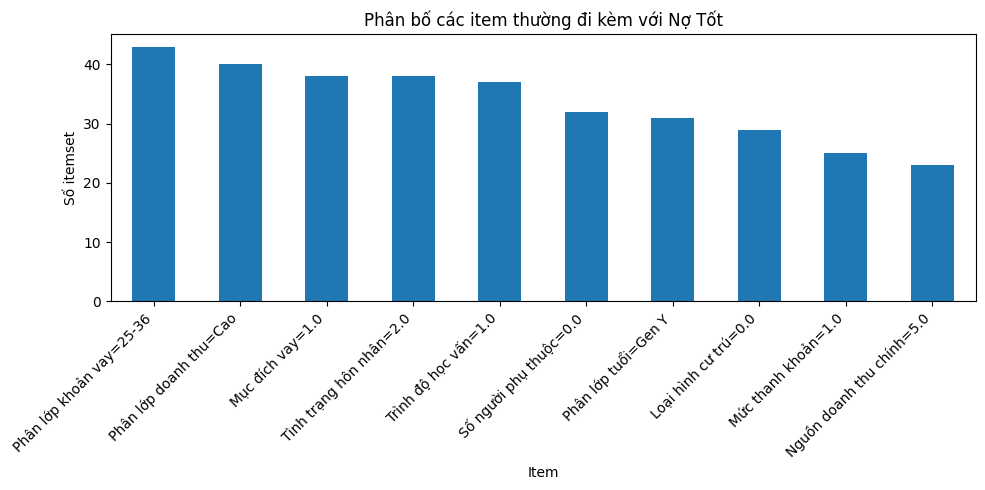

In [ ]:
good_counts.head(10).plot(
    kind="bar",
    x="Item",
    y="Số itemset",
    legend=False,
    figsize=(10, 5)
)

plt.title("Phân bố các item thường đi kèm với Nợ Tốt")
plt.xlabel("Item")
plt.ylabel("Số itemset")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

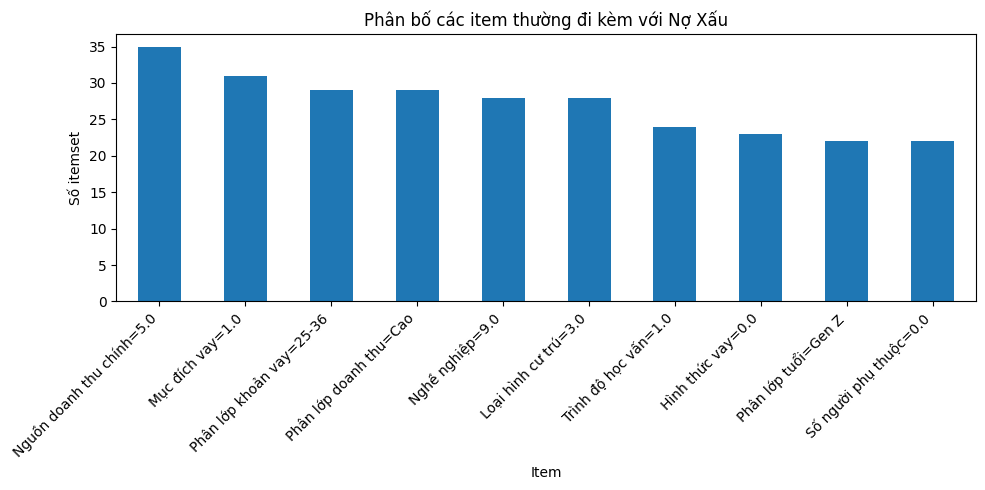

In [ ]:
bad_counts.head(10).plot(
    kind="bar",
    x="Item",
    y="Số itemset",
    legend=False,
    figsize=(10, 5)
)

plt.title("Phân bố các item thường đi kèm với Nợ Xấu")
plt.xlabel("Item")
plt.ylabel("Số itemset")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
rules_conf_df = pd.DataFrame(rules)

rules_conf_df = (
    rules_conf_df
    .sort_values(by=['Consequent', 'Confidence'], ascending=False)
    .reset_index(drop=True)
)

rules_conf_df


,Antecedent,Consequent,Support_XY,Support_X,Confidence
0,"(Nghề nghiệp=9.0, Số năm kinh nghiệm=5.0)",Tình trạng tín dụng=Xấu,0.10,0.10,1.00
1,"(Nghề nghiệp=9.0, TỈNH=Cà Mau)",Tình trạng tín dụng=Xấu,0.10,0.10,1.00
2,"(Nghề nghiệp=9.0, Số người phụ thuộc=1.0)",Tình trạng tín dụng=Xấu,0.10,0.10,1.00
3,"(Nghề nghiệp=9.0, Phân lớp tuổi=Gen Z)",Tình trạng tín dụng=Xấu,0.20,0.20,1.00
4,"(Nghề nghiệp=9.0, Phân lớp khoản vay=25-36)",Tình trạng tín dụng=Xấu,0.20,0.20,1.00
...,...,...,...,...,...
561,"(Nghề nghiệp=9.0, Nguồn doanh thu chính=5.0)",Tình trạng tín dụng=Tốt,0.10,0.40,0.25
562,"(Nghề nghiệp=9.0, Loại hình cư trú=3.0)",Tình trạng tín dụng=Tốt,0.10,0.40,0.25
563,"(Mục đích vay=1.0, Nguồn doanh thu chính=5.0)",Tình trạng tín dụng=Tốt,0.10,0.40,0.25
564,"(Phân lớp khoản vay=25-36, Nguồn doanh thu chí...",Tình trạng tín dụng=Tốt,0.10,0.40,0.25


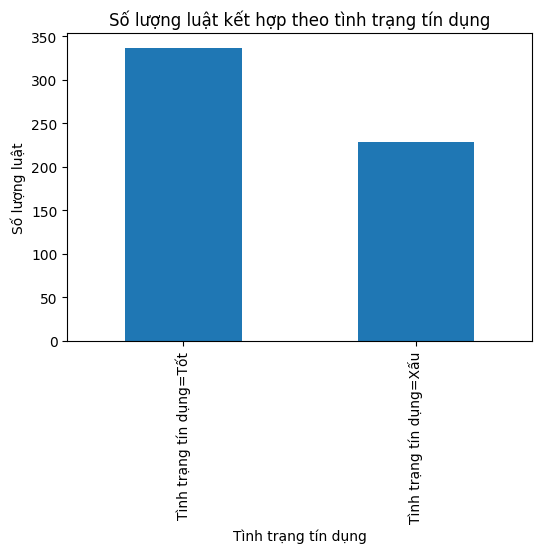

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
rules_conf_df["Consequent"].value_counts().plot(kind="bar")
plt.xlabel("Tình trạng tín dụng")
plt.ylabel("Số lượng luật")
plt.title("Số lượng luật kết hợp theo tình trạng tín dụng")
plt.show()

# In ra kết quả các rule có kqua cao nhất

In [ ]:
top_support_rules = (
    rules_conf_df
    .sort_values(by="Support_XY", ascending=False)
    .head(20)
    .reset_index(drop=True)
)
pd.display(max.column)
top_support_rules

,Antecedent,Consequent,Support_XY,Support_X,Confidence
0,"(Mục đích vay=1.0, Tình trạng hôn nhân=2.0)",Tình trạng tín dụng=Tốt,0.4,0.4,1.00
1,"(Nguồn doanh thu chính=5.0, Loại hình cư trú=3.0)",Tình trạng tín dụng=Xấu,0.3,0.4,0.75
2,"(Nghề nghiệp=9.0, Nguồn doanh thu chính=5.0)",Tình trạng tín dụng=Xấu,0.3,0.4,0.75
3,"(Nghề nghiệp=9.0, Loại hình cư trú=3.0)",Tình trạng tín dụng=Xấu,0.3,0.4,0.75
4,"(Mục đích vay=1.0, Nguồn doanh thu chính=5.0)",Tình trạng tín dụng=Xấu,0.3,0.4,0.75
5,"(Phân lớp doanh thu=Cao, Nguồn doanh thu chính...",Tình trạng tín dụng=Xấu,0.3,0.5,0.60
6,"(Phân lớp doanh thu=Cao, Phân lớp khoản vay=25...",Tình trạng tín dụng=Xấu,0.3,0.6,0.50
7,"(Phân lớp khoản vay=25-36, Tình trạng hôn nhân...",Tình trạng tín dụng=Tốt,0.3,0.3,1.00
8,"(Phân lớp khoản vay=25-36, Nguồn doanh thu chí...",Tình trạng tín dụng=Xấu,0.3,0.4,0.75
9,"(Mục đích vay=1.0, Loại hình cư trú=0.0)",Tình trạng tín dụng=Tốt,0.3,0.3,1.00
